# Assignment 2

## Clustering Assignment
In this assingment you will cluster your data and create predictive linear and logistic models.

Cluster your data:
Use at least two methods to cluster your data. (25 points)
Answer the following questions for the clustering:

* Do the clustering methods generate the same clusters?
* Does scaling effect the clustering?  
* Does the clustering produce interesting groupings?  


In [1]:
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
%matplotlib inline

In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


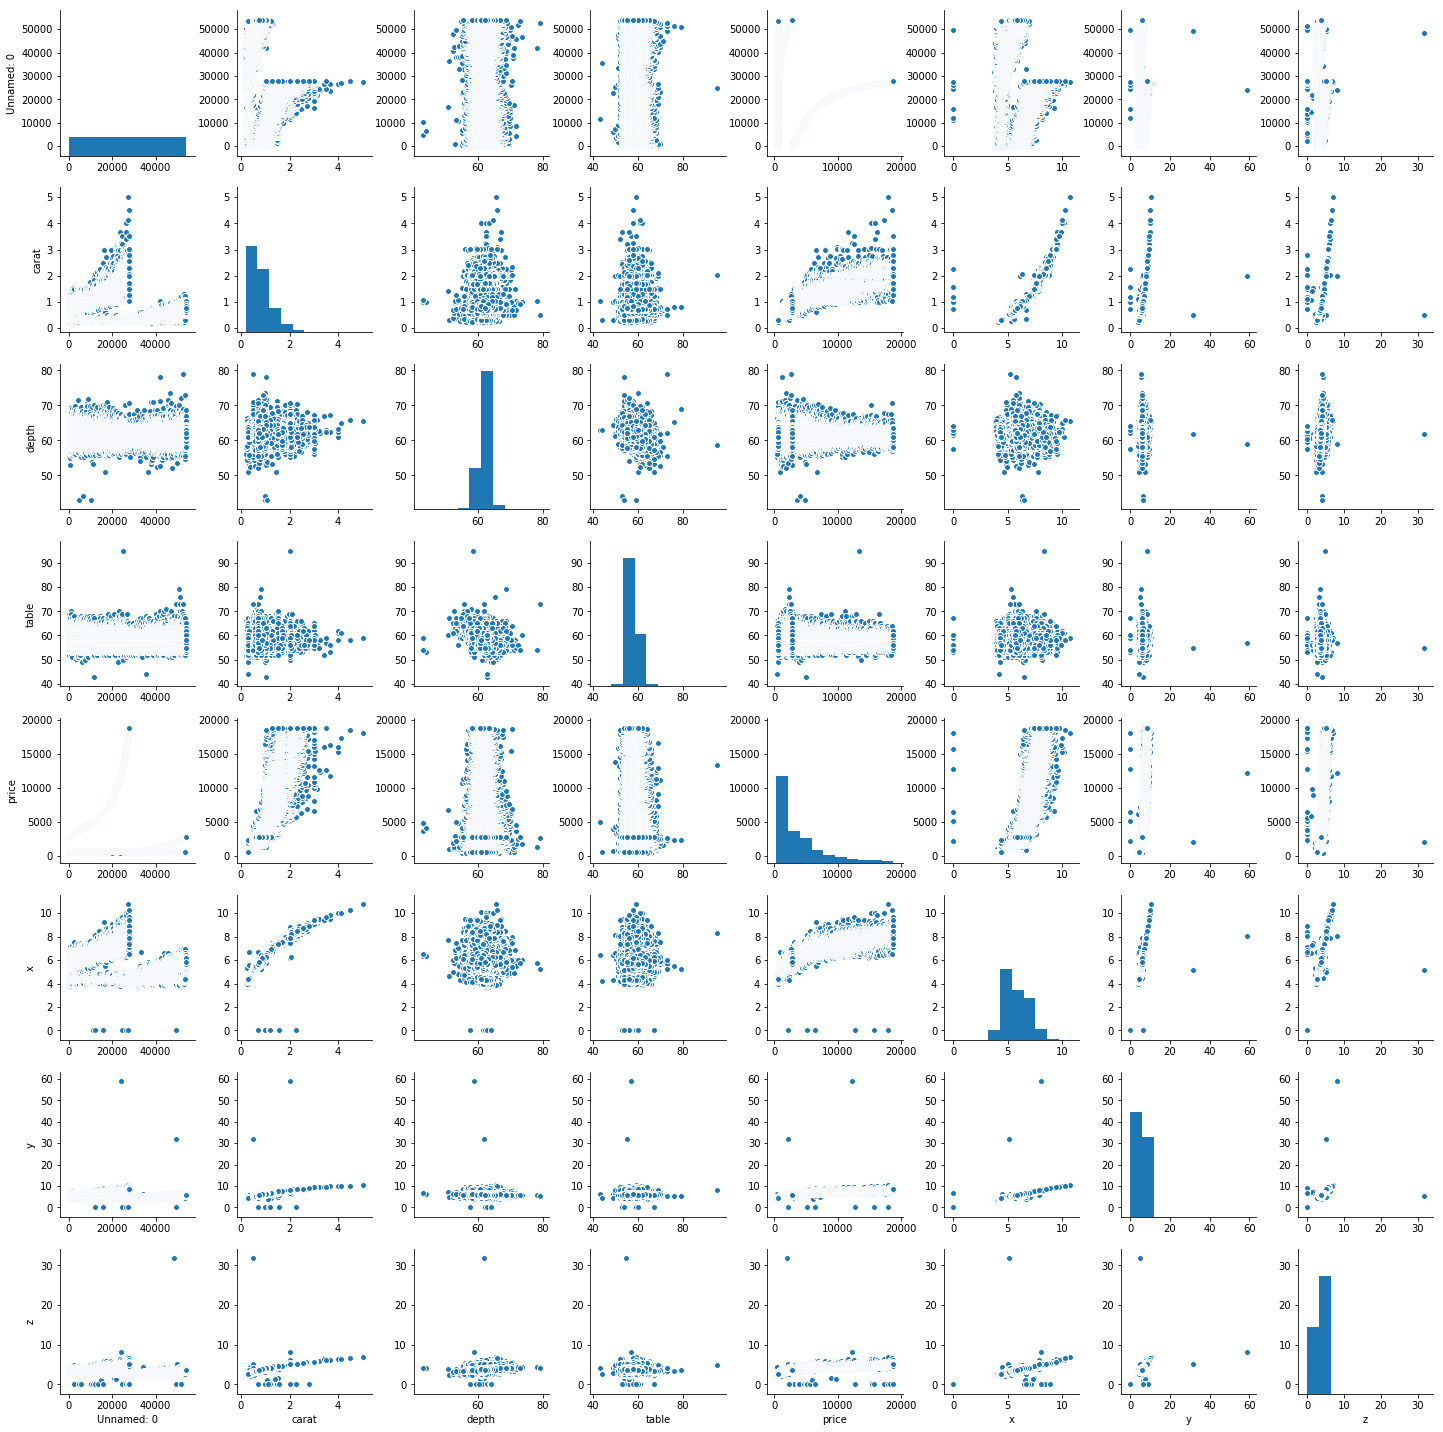

In [7]:
sns.pairplot(data)

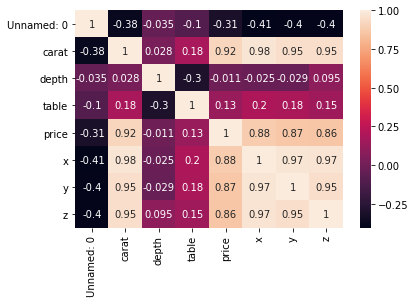

In [6]:
sns.heatmap(data.corr(),annot=True)
plt.rcParams['figure.figsize']=(15,15)

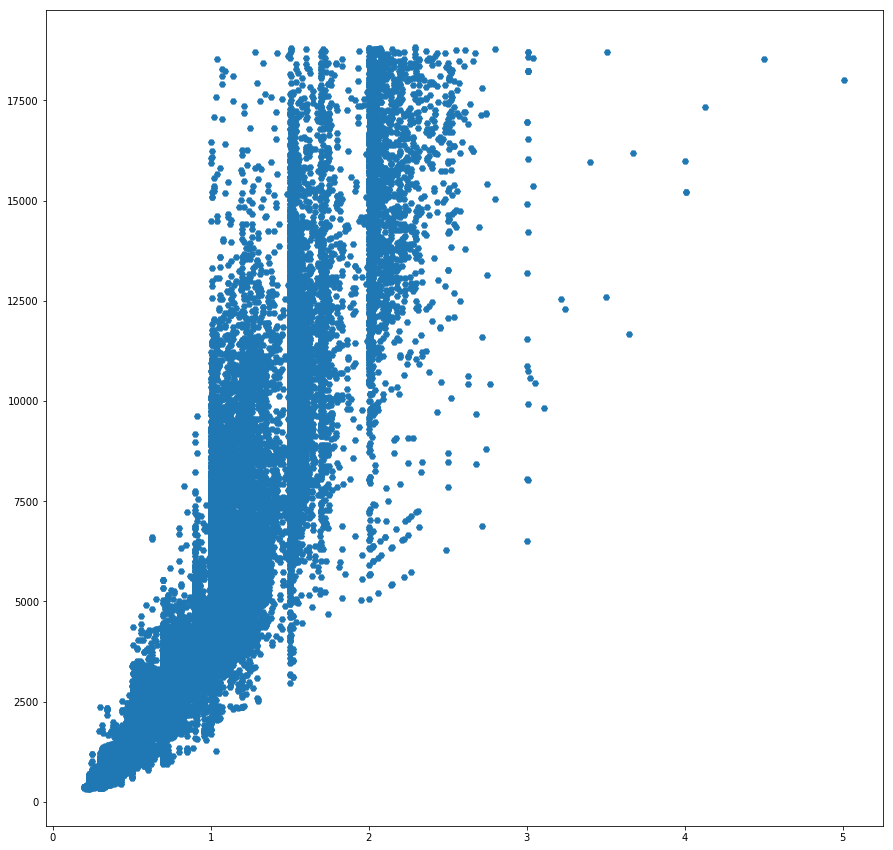

In [22]:
plt.scatter(data['carat'],data['price'],marker='H')

In [7]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

### Perfoming K-Means Clustering

In [23]:
k_means=KMeans(n_clusters=5)
x=data[['price','carat']]
x.head()

,price,carat
0,326,0.23
1,326,0.21
2,327,0.23
3,334,0.29
4,335,0.31


In [24]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
k_means.cluster_centers_

array([[  3.67590257e+03,   8.93074851e-01],
       [  1.57205224e+04,   1.90571535e+00],
       [  6.46870587e+03,   1.17476991e+00],
       [  1.12128756e+03,   4.28036219e-01],
       [  1.05186854e+04,   1.48809380e+00]])

In [26]:
k_means.labels_

array([3, 3, 3, ..., 0, 0, 0])

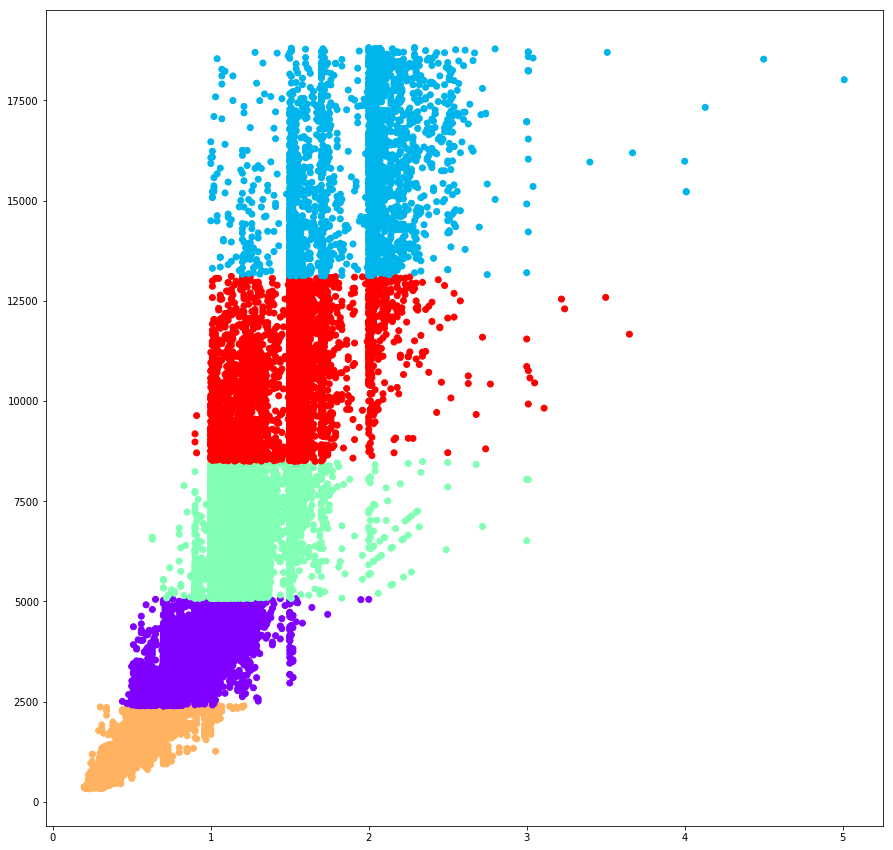

In [28]:
plt.scatter(data['carat'],data['price'],c=k_means.labels_,cmap='rainbow')

In [29]:
#from sklearn.datasets import load_digits
#digits = load_digits()
#print digits.data.shape
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(x)
kmeans.cluster_centers_.shape

(5, 2)

### Performing Scaling

Text(0.5,1,'Normalised K-means')

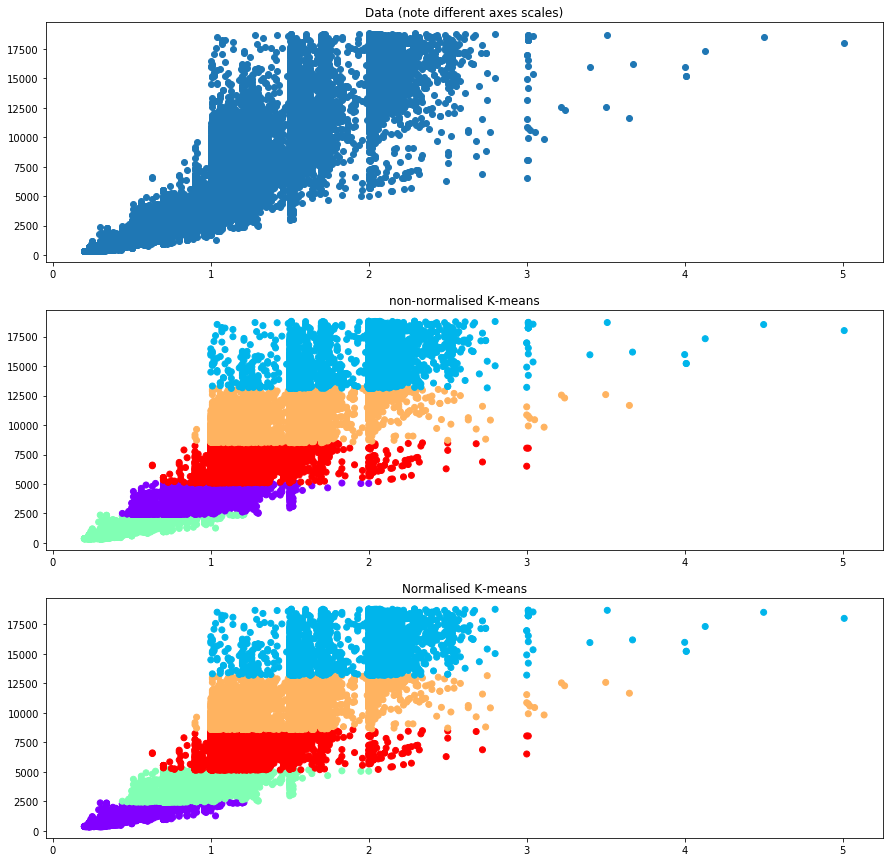

In [43]:
fig, axes = plt.subplots(3, 1)

axes[0].scatter(x['carat'],x['price'])
axes[0].set_title('Data (note different axes scales)')

km = KMeans(5)

clusters = km.fit_predict(np.array([x['carat']*15,x['price']]).T)

axes[1].scatter(x['carat'],x['price'], c=clusters, cmap='rainbow')
axes[1].set_title('non-normalised K-means')

clusters = km.fit_predict(np.array([x['carat']*15, x['price']*20]).T)

axes[2].scatter(x['carat'],x['price'], c=clusters, cmap='rainbow')
axes[2].set_title('Normalised K-means')

### Performing DBSCAN Estimator

Counter({1: 30552, 0: 20010, 2: 1219, 3: 456, 8: 209, 14: 193, 5: 188, 11: 173, 6: 92, 23: 52, 9: 51, 10: 51, 16: 50, 15: 47, -1: 46, 4: 45, 13: 44, 22: 43, 12: 41, 33: 33, 29: 31, 7: 30, 24: 30, 27: 26, 17: 25, 25: 25, 21: 24, 20: 23, 30: 22, 18: 21, 26: 20, 34: 18, 28: 14, 31: 13, 32: 13, 19: 10})


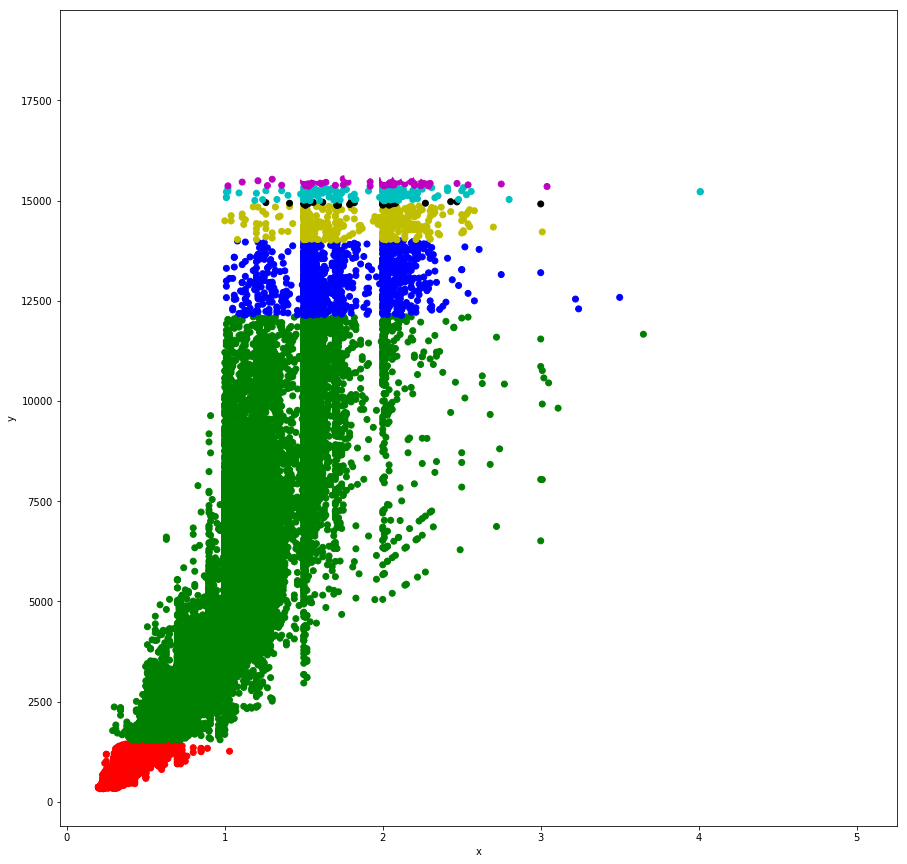

In [36]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=15, min_samples=10)
z=data[['carat','price']]
estimator.fit(z)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# print labels
print(Counter(labels))

colors = set_colors(labels)
plt.scatter(data['carat'],data['price'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Performing Scaling on Dbscan

Text(0.5,1,'Normalised DBSCAN')

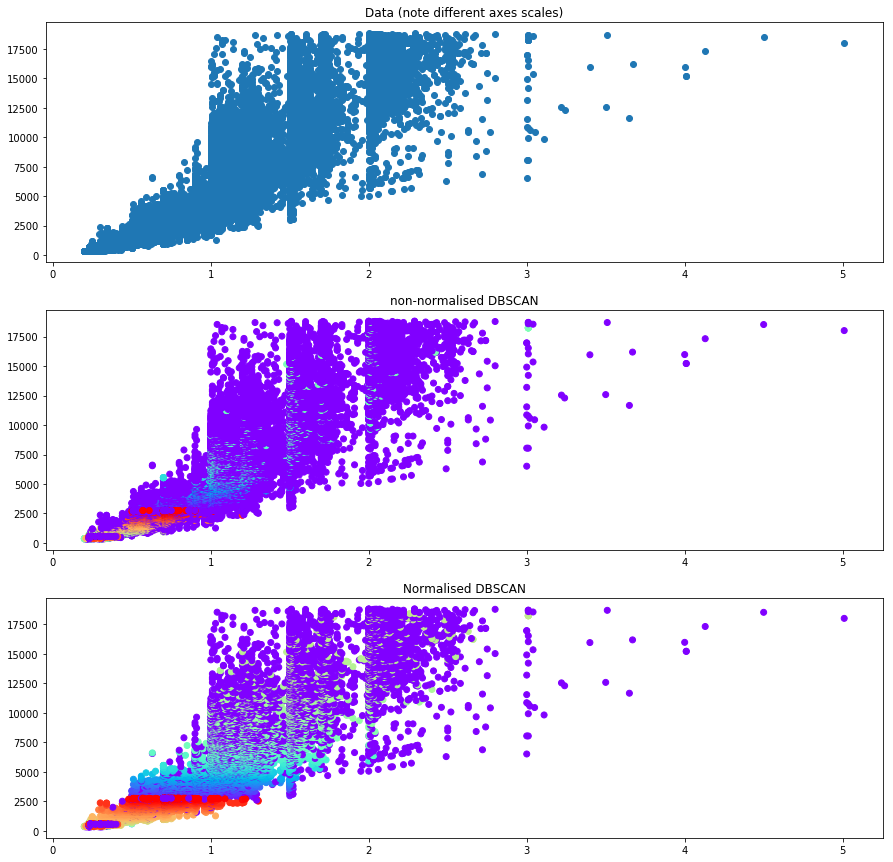

In [45]:
fig, axes = plt.subplots(3, 1)

axes[0].scatter(x['carat'],x['price'])
axes[0].set_title('Data (note different axes scales)')

db = DBSCAN(eps=0.5, min_samples=3)

clusters = db.fit_predict(np.array([x['carat']*10,x['price']]).T)

axes[1].scatter(x['carat'],x['price'], c=clusters, cmap='rainbow')
axes[1].set_title('non-normalised DBSCAN')

clusters = db.fit_predict(np.array([x['carat'] , x['price']*10]).T)

axes[2].scatter(x['carat'],x['price'], c=clusters, cmap='rainbow')
axes[2].set_title('Normalised DBSCAN')

* Do the clustering methods generate the same clusters?
   * No, K-Means and DBSCAN clustering generate different cluster
* Does scaling effect the clustering?
   * Scaling has no effect in K-means Clustering 
   * Scaling has effect in DBSCAN CLustering
* Does the clustering produce interesting groupings?
   * Yes, clustering produces interesting groups
    